In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from tensorflow.keras.utils import to_categorical
import math
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [2]:
data_train = pd.read_csv('churn-bigml-80 .csv') # Загружаем обучающие данные
data_test = pd.read_csv('churn-bigml-20.csv')   # Загружаем тестовые данные

In [3]:
data_train.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Ручками обрабатывает данные

In [4]:
data_train['Churn'] = data_train['Churn'].map({True: 1, False: 0})
data_test['Churn'] = data_test['Churn'].map({True: 1, False: 0})

data_train['International plan'] = data_train['International plan'].map({'Yes': 1, 'No': 0})
data_train['Voice mail plan'] = data_train['Voice mail plan'].map({'Yes': 1, 'No': 0})

data_test['International plan'] = data_test['International plan'].map({'Yes': 1, 'No': 0})
data_test['Voice mail plan'] = data_test['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [5]:
x_train = data_train.drop(data_train.columns[[0, 1, 2, -1]], axis = 1)
y_train = data_train['Churn']

x_test = data_test.drop(data_test.columns[[0, 1, 2, -1]], axis = 1)
y_test = data_test['Churn']

In [6]:
x_test

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1
1,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4
2,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4
3,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2
4,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,0,1,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2
663,0,1,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1
664,0,0,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3
665,0,0,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1


In [7]:
minmax = MinMaxScaler()

In [8]:
x_train = minmax.fit_transform(x_train)
x_test = minmax.fit_transform(x_test)

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()

model.add(layers.Dense(64, activation="relu", input_shape = (16,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

In [10]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1088      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,313
Trainable params: 5,313
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=35, batch_size=160)

Epoch 1/35
17/17 [==============================] - 0s 8ms/step - loss: 0.2553 - accuracy: 0.9032 - val_loss: 0.2295 - val_accuracy: 0.9265
Epoch 2/35
17/17 [==============================] - 0s 6ms/step - loss: 0.2541 - accuracy: 0.9092 - val_loss: 0.2279 - val_accuracy: 0.9235
Epoch 3/35
17/17 [==============================] - 0s 5ms/step - loss: 0.2536 - accuracy: 0.9021 - val_loss: 0.2325 - val_accuracy: 0.9220
Epoch 4/35
17/17 [==============================] - 0s 5ms/step - loss: 0.2485 - accuracy: 0.9092 - val_loss: 0.2296 - val_accuracy: 0.9265
Epoch 5/35
17/17 [==============================] - 0s 6ms/step - loss: 0.2558 - accuracy: 0.9040 - val_loss: 0.2236 - val_accuracy: 0.9235
Epoch 6/35
17/17 [==============================] - 0s 6ms/step - loss: 0.2549 - accuracy: 0.9040 - val_loss: 0.2299 - val_accuracy: 0.9220
Epoch 7/35
17/17 [==============================] - 0s 6ms/step - loss: 0.2483 - accuracy: 0.9010 - val_loss: 0.2251 - val_accuracy: 0.9280
Epoch 8/35
17/17 [==

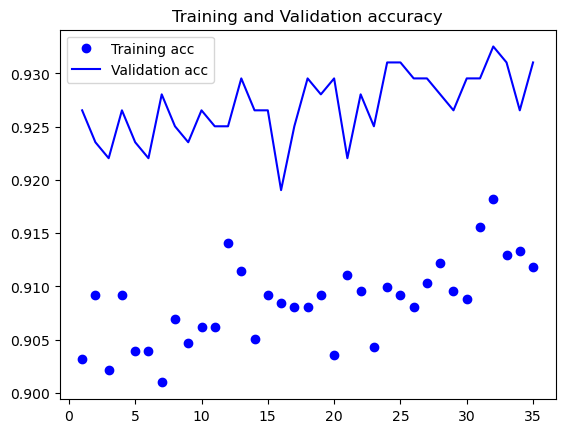

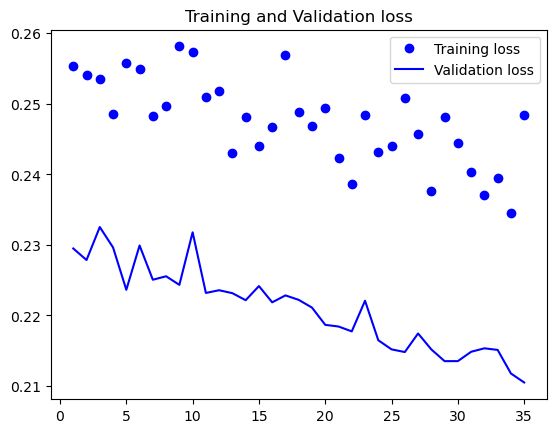

In [17]:
import matplotlib.pyplot as plt
# графики
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [137]:
!pip install tensorflow